# MNIST - Categorical Classification
> # Batch Normalization


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. MNIST Data_Set Load

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [3]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

* Normalization

In [4]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 * 활성화 함수의 입력값을 정규화 과정을 수행하여 전달
 * Gradient Vanishing 문제 해결 및 더 큰 Learning Rate를 사용 가능

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [7]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

> ## 2) Model Compile

* 모델 학습방법 설정

In [8]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [9]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.1810 - accuracy: 0.9456 - val_loss: 0.1065 - val_accuracy: 0.9682
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0750 - accuracy: 0.9776 - val_loss: 0.0949 - val_accuracy: 0.9726
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.1041 - val_accuracy: 0.9706
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0915 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0890 - val_accuracy: 0.9769
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.1115 - val_accuracy: 0.9726
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0870 - val_accuracy: 0.9779

> ## 4) 학습 결과 시각화

* Loss Visualization

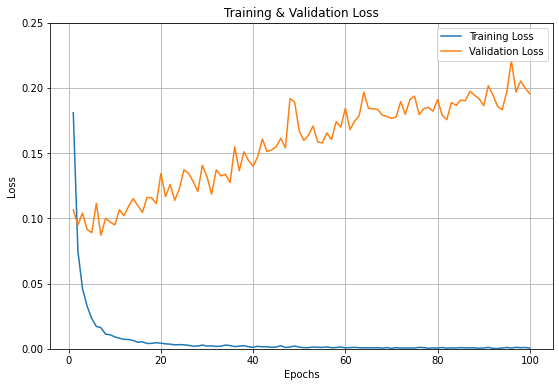

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [11]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9836
Loss = 0.17577
Accuracy = 0.98360


# 
# 
# 
# The End
# 
# 
# 